In [479]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
import missingno as msno

In [480]:
admission = pd.read_csv("admission.csv")
age = pd.read_csv("age.csv")
signal = pd.read_csv("signal.csv")

In [481]:
print(admission.head())
print(age.head())
print(signal.head())

  ;pat_id;date_admission;date_discharge
0     19292;1081;14/05/2014;16/05/2014;
1     19293;1304;13/06/2014;14/06/2014;
2     19295;1101;14/05/2014;17/05/2014;
3      19298;895;24/06/2014;25/06/2014;
4     19299;1468;24/07/2014;25/07/2014;
  ;pat_id;age
0   0;0;35.0;
1   1;1;77.0;
2   2;2;77.0;
3   3;3;61.0;
4   4;4;27.0;
         ;Unnamed: 0;pat_id;day;hour;parameter;value
0  0;0;0;2016-01-05;23;blood_pressure;104.5431807...
1  1;1;0;2016-01-06;0;blood_pressure;110.54254403...
2  2;2;0;2016-01-06;1;blood_pressure;133.83200198...
3  3;3;0;2016-01-06;2;blood_pressure;133.06766595...
4  4;4;0;2016-01-06;3;blood_pressure;134.56600320...


In [482]:
age.shape

(1495, 1)

In [483]:
signal.shape

(99914, 1)

In [484]:
admission.shape

(1569, 1)

# Data Cleansing Phaze

In [485]:
admission = admission[';pat_id;date_admission;date_discharge'].str.split(';', expand=True)
age = age [";pat_id;age"].str.split(";", expand=True)
signal = signal[";Unnamed: 0;pat_id;day;hour;parameter;value"].str.split(";", expand = True)

In [486]:
admission.head()

,0,1,2,3,4
0,19292,1081,14/05/2014,16/05/2014,
1,19293,1304,13/06/2014,14/06/2014,
2,19295,1101,14/05/2014,17/05/2014,
3,19298,895,24/06/2014,25/06/2014,
4,19299,1468,24/07/2014,25/07/2014,


In [487]:
age.head()

,0,1,2,3
0,0,0,35.0,
1,1,1,77.0,
2,2,2,77.0,
3,3,3,61.0,
4,4,4,27.0,


In [488]:
signal.head()

,0,1,2,3,4,5,6
0,0,0,0,2016-01-05,23,blood_pressure,104.54318079537045
1,1,1,0,2016-01-06,0,blood_pressure,110.54254403318735
2,2,2,0,2016-01-06,1,blood_pressure,133.8320019876634
3,3,3,0,2016-01-06,2,blood_pressure,133.06766595660827
4,4,4,0,2016-01-06,3,blood_pressure,134.56600320276337


## Specification Columns to the Data

In [489]:
admission.columns = ["NONE", "pat_id", "date_admission", "date_discharge", "NONE"]
age.columns = ["NONE", "pat_id", "age", "NONE"]
signal.columns = ["NONE", "NONE", "pat_id", "day" , "hour", "parameter" , "value"]

In [490]:
admission = admission.drop(columns=["NONE" , "NONE"], axis = 1)
age = age.drop(columns=['NONE',"NONE"], axis = 1)
signal = signal.drop(columns= ["NONE" , "NONE"] , axis = 1)

In [491]:
admission.head()

,pat_id,date_admission,date_discharge
0,1081,14/05/2014,16/05/2014
1,1304,13/06/2014,14/06/2014
2,1101,14/05/2014,17/05/2014
3,895,24/06/2014,25/06/2014
4,1468,24/07/2014,25/07/2014


In [492]:
admission.dtypes

pat_id            object
date_admission    object
date_discharge    object
dtype: object

In [493]:
admission["pat_id"] = pd.to_numeric(admission["pat_id"], downcast="integer")

In [494]:
admission.dtypes

pat_id             int16
date_admission    object
date_discharge    object
dtype: object

In [495]:
age.dtypes

pat_id    object
age       object
dtype: object

In [496]:
age["pat_id"] = pd.to_numeric(age["pat_id"], downcast="integer")
age["age"] = pd.to_numeric(age["age"], downcast="integer")
age.dtypes

pat_id    int16
age        int8
dtype: object

In [497]:
signal.dtypes

pat_id       object
day          object
hour         object
parameter    object
value        object
dtype: object

### Chanding the ".dtype" of the object to able to work with them

In [498]:
signal["pat_id"] = pd.to_numeric(signal["pat_id"], downcast="integer")
signal["hour"] = pd.to_numeric(signal["hour"], downcast="integer")
signal["value"] = pd.to_numeric(signal["value"], downcast="float")
signal.dtypes

pat_id         int16
day           object
hour            int8
parameter     object
value        float32
dtype: object

In [499]:
admission.head(10)

,pat_id,date_admission,date_discharge
0,1081,14/05/2014,16/05/2014
1,1304,13/06/2014,14/06/2014
2,1101,14/05/2014,17/05/2014
3,895,24/06/2014,25/06/2014
4,1468,24/07/2014,25/07/2014
5,581,15/05/2014,16/05/2014
6,586,04/07/2014,05/07/2014
7,656,05/07/2014,06/07/2014
8,421,16/05/2014,17/05/2014
9,1306,06/07/2014,07/07/2014


In [500]:
age.head(10)

,pat_id,age
0,0,35
1,1,77
2,2,77
3,3,61
4,4,27
5,5,67
6,6,38
7,7,84
8,8,71
9,9,60


In [501]:
#signal.head(10)
signal["day"] = pd.to_datetime(signal["day"],  dayfirst=True)

In [502]:
signal.head()

,pat_id,day,hour,parameter,value
0,0,2016-01-05,23,blood_pressure,104.543182
1,0,2016-01-06,0,blood_pressure,110.542542
2,0,2016-01-06,1,blood_pressure,133.832001
3,0,2016-01-06,2,blood_pressure,133.067673
4,0,2016-01-06,3,blood_pressure,134.566010


In [503]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99914 entries, 0 to 99913
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pat_id     99914 non-null  int16         
 1   day        99914 non-null  datetime64[ns]
 2   hour       99914 non-null  int8          
 3   parameter  99914 non-null  object        
 4   value      99914 non-null  float32       
dtypes: datetime64[ns](1), float32(1), int16(1), int8(1), object(1)
memory usage: 2.2+ MB


### To see how many parameter exist in the "parameter" 

In [504]:
signal["parameter"].unique()

array(['blood_pressure', 'respiration_rate', 'temperature'], dtype=object)

### To divide different parameters through get_dummies

In [505]:
signal = pd.get_dummies(signal, columns = ['parameter'])

In [506]:
signal

,pat_id,day,hour,value,parameter_blood_pressure,parameter_respiration_rate,parameter_temperature
0,0,2016-01-05,23,104.543182,1,0,0
1,0,2016-01-06,0,110.542542,1,0,0
2,0,2016-01-06,1,133.832001,1,0,0
3,0,2016-01-06,2,133.067673,1,0,0
4,0,2016-01-06,3,134.566010,1,0,0
...,...,...,...,...,...,...,...
99909,1568,2016-01-19,10,143.166336,1,0,0
99910,1568,2016-01-19,11,145.432510,1,0,0
99911,1568,2016-01-19,12,144.899673,1,0,0
99912,1568,2016-01-19,12,4.000000,0,1,0


### To sort Values through "pat_id"

In [510]:
admission = admission.sort_values(by=['pat_id'])
admission["date_admission"] = pd.to_datetime(admission["date_admission"],  dayfirst=True)
admission["date_discharge"] = pd.to_datetime(admission["date_discharge"],  dayfirst=True)

In [511]:
admission

,pat_id,date_admission,date_discharge
1344,0,2016-01-05,2016-01-07
180,1,2014-07-04,2014-07-06
448,3,2014-10-16,2014-10-20
730,4,2015-02-06,2015-02-07
532,5,2014-12-06,2014-12-08
...,...,...,...
1545,1564,2016-07-29,2016-07-30
835,1565,2015-04-21,2015-04-22
611,1566,2015-01-10,2015-01-10
637,1567,2015-01-31,2015-02-01


In [512]:
age = age.sort_values(by=['pat_id'])
age

,pat_id,age
0,0,35
1,1,77
2,2,77
3,3,61
4,4,27
...,...,...
1490,1564,87
1491,1565,68
1492,1566,73
1493,1567,83


### To merge different datasets

In [513]:
new_df = pd.merge(admission,age)
new_df

,pat_id,date_admission,date_discharge,age
0,0,2016-01-05,2016-01-07,35
1,1,2014-07-04,2014-07-06,77
2,3,2014-10-16,2014-10-20,61
3,4,2015-02-06,2015-02-07,27
4,5,2014-12-06,2014-12-08,67
...,...,...,...,...
1495,1564,2016-07-29,2016-07-30,87
1496,1565,2015-04-21,2015-04-22,68
1497,1566,2015-01-10,2015-01-10,73
1498,1567,2015-01-31,2015-02-01,83


In [514]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pat_id          1500 non-null   int16         
 1   date_admission  1500 non-null   datetime64[ns]
 2   date_discharge  1500 non-null   datetime64[ns]
 3   age             1500 non-null   int8          
dtypes: datetime64[ns](2), int16(1), int8(1)
memory usage: 39.6 KB


In [515]:
signal = signal.sort_values(by=['pat_id'])

In [516]:
signal

,pat_id,day,hour,value,parameter_blood_pressure,parameter_respiration_rate,parameter_temperature
0,0,2016-01-05,23,104.543182,1,0,0
29,0,2016-01-06,21,129.121765,1,0,0
30,0,2016-01-06,21,1.990000,0,1,0
31,0,2016-01-06,22,123.634338,1,0,0
32,0,2016-01-06,22,2.000000,0,1,0
...,...,...,...,...,...,...,...
99884,1568,2016-01-18,16,117.266335,1,0,0
99883,1568,2016-01-18,15,109.000000,1,0,0
99912,1568,2016-01-19,12,4.000000,0,1,0
99897,1568,2016-01-19,2,6.010000,0,1,0


In [517]:
final_dataset = pd.merge(new_df,signal)
final_dataset.head()

,pat_id,date_admission,date_discharge,age,day,hour,value,parameter_blood_pressure,parameter_respiration_rate,parameter_temperature
0,0,2016-01-05,2016-01-07,35,2016-01-05,23,104.543182,1,0,0
1,0,2016-01-05,2016-01-07,35,2016-01-06,21,129.121765,1,0,0
2,0,2016-01-05,2016-01-07,35,2016-01-06,21,1.990000,0,1,0
3,0,2016-01-05,2016-01-07,35,2016-01-06,22,123.634338,1,0,0
4,0,2016-01-05,2016-01-07,35,2016-01-06,22,2.000000,0,1,0


In [518]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109052 entries, 0 to 109051
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   pat_id                      109052 non-null  int16         
 1   date_admission              109052 non-null  datetime64[ns]
 2   date_discharge              109052 non-null  datetime64[ns]
 3   age                         109052 non-null  int8          
 4   day                         109052 non-null  datetime64[ns]
 5   hour                        109052 non-null  int8          
 6   value                       109052 non-null  float32       
 7   parameter_blood_pressure    109052 non-null  uint8         
 8   parameter_respiration_rate  109052 non-null  uint8         
 9   parameter_temperature       109052 non-null  uint8         
dtypes: datetime64[ns](3), float32(1), int16(1), int8(2), uint8(3)
memory usage: 4.5 MB


### To Extract tripartite parameters (features)

In [519]:
final_dataset['blood_pressure'] = np.where((final_dataset['parameter_blood_pressure'] == 1)
                     , final_dataset['value'], np.nan)
final_dataset['respiration_rate'] = np.where((final_dataset['parameter_respiration_rate'] == 1)
                     , final_dataset['value'], np.nan)
final_dataset['body_temp'] = np.where((final_dataset['parameter_temperature'] == 1)
                     , final_dataset['value'], np.nan)

### Filling the NaN values with the mean of each column

In [520]:
final_dataset["blood_pressure"].fillna(final_dataset["blood_pressure"].mean(), inplace = True)
final_dataset["respiration_rate"].fillna(final_dataset["respiration_rate"].mean(), inplace = True)
final_dataset["body_temp"].fillna(final_dataset["body_temp"].mean(), inplace = True)

In [521]:
final_dataset["body_temp"].value_counts()

37.386463    101473
36.917950       225
36.928207       218
36.923080       209
37.128208       192
              ...  
38.174358         1
40.415386         1
38.971794         1
39.230770         1
34.866665         1
Name: body_temp, Length: 238, dtype: int64

In [522]:
final_dataset.drop('parameter_temperature', axis=1, inplace=True)
final_dataset.drop('parameter_blood_pressure', axis=1, inplace=True)
final_dataset.drop('parameter_respiration_rate', axis=1, inplace=True)
final_dataset.drop('value', axis=1, inplace=True)
final_dataset.drop('hour', axis=1, inplace=True)

In [523]:
final_dataset.head(60)

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp
0,0,2016-01-05,2016-01-07,35,2016-01-05,104.543182,8.326612,37.386463
1,0,2016-01-05,2016-01-07,35,2016-01-06,129.121765,8.326612,37.386463
2,0,2016-01-05,2016-01-07,35,2016-01-06,126.221130,1.990000,37.386463
3,0,2016-01-05,2016-01-07,35,2016-01-06,123.634338,8.326612,37.386463
4,0,2016-01-05,2016-01-07,35,2016-01-06,126.221130,2.000000,37.386463
5,0,2016-01-05,2016-01-07,35,2016-01-06,130.165497,8.326612,37.386463
6,0,2016-01-05,2016-01-07,35,2016-01-07,134.534164,8.326612,37.386463
7,0,2016-01-05,2016-01-07,35,2016-01-07,126.221130,2.010000,37.386463
8,0,2016-01-05,2016-01-07,35,2016-01-07,136.966171,8.326612,37.386463
9,0,2016-01-05,2016-01-07,35,2016-01-07,124.365005,8.326612,37.386463


In [524]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109052 entries, 0 to 109051
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   pat_id            109052 non-null  int16         
 1   date_admission    109052 non-null  datetime64[ns]
 2   date_discharge    109052 non-null  datetime64[ns]
 3   age               109052 non-null  int8          
 4   day               109052 non-null  datetime64[ns]
 5   blood_pressure    109052 non-null  float32       
 6   respiration_rate  109052 non-null  float32       
 7   body_temp         109052 non-null  float32       
dtypes: datetime64[ns](3), float32(3), int16(1), int8(1)
memory usage: 4.9 MB


In [525]:
final_dataset.describe()

,pat_id,age,blood_pressure,respiration_rate,body_temp
count,109052.000000,109052.000000,109052.000000,109052.000000,109052.000000
mean,872.776519,59.027290,126.167046,8.319889,37.433285
std,440.129090,16.565187,21.643925,2.964234,0.251623
min,0.000000,12.000000,20.000004,-0.010000,31.692310
25%,515.000000,50.000000,116.507965,8.326612,37.386463
50%,908.000000,63.000000,126.221130,8.326612,37.386463
75%,1259.000000,71.000000,128.610130,8.326612,37.386463
max,1568.000000,91.000000,592.000000,149.990005,40.923077


## To Assign 0 for datas which are recorded all staying day in ICU except last day and 1 for the day of staying at ICU!

### I assume that at the last day of staying at ICU the condition of patients has become stable so it can be considered as the well-being condition!

In [534]:
final_dataset['date_discharge']=final_dataset['date_discharge'].astype(str)
final_dataset['day']=final_dataset['day'].astype(str)

final_dataset ['go_home?'] = np.where((final_dataset['date_discharge'] == final_dataset['day'])
                     , 1, 0)

In [535]:
final_dataset.tail()

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
109047,1568,2016-01-18,2016-01-19,64,2016-01-18,117.266335,8.326612,37.386463,0
109048,1568,2016-01-18,2016-01-19,64,2016-01-18,109.000000,8.326612,37.386463,0
109049,1568,2016-01-18,2016-01-19,64,2016-01-19,126.221130,4.000000,37.386463,1
109050,1568,2016-01-18,2016-01-19,64,2016-01-19,126.221130,6.010000,37.386463,1
109051,1568,2016-01-18,2016-01-19,64,2016-01-19,157.562180,8.326612,37.386463,1


In [536]:
#final_dataset.drop("date_admission", axis = 1 , inplace = True)
#final_dataset.drop("day", axis = 1 , inplace = True)
#final_dataset.drop("hour", axis = 1 , inplace = True)
#final_dataset.drop("value", axis = 1 , inplace = True)

In [537]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109052 entries, 0 to 109051
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   pat_id            109052 non-null  int16         
 1   date_admission    109052 non-null  datetime64[ns]
 2   date_discharge    109052 non-null  object        
 3   age               109052 non-null  int8          
 4   day               109052 non-null  object        
 5   blood_pressure    109052 non-null  float32       
 6   respiration_rate  109052 non-null  float32       
 7   body_temp         109052 non-null  float32       
 8   go_home?          109052 non-null  int64         
dtypes: datetime64[ns](1), float32(3), int16(1), int64(1), int8(1), object(2)
memory usage: 5.7+ MB


In [538]:
final_dataset.head()

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
0,0,2016-01-05,2016-01-07,35,2016-01-05,104.543182,8.326612,37.386463,0
1,0,2016-01-05,2016-01-07,35,2016-01-06,129.121765,8.326612,37.386463,0
2,0,2016-01-05,2016-01-07,35,2016-01-06,126.221130,1.990000,37.386463,0
3,0,2016-01-05,2016-01-07,35,2016-01-06,123.634338,8.326612,37.386463,0
4,0,2016-01-05,2016-01-07,35,2016-01-06,126.221130,2.000000,37.386463,0


In [539]:
"""from numpy import nan
final_dataset["BP"] = final_dataset.loc[final_dataset['go_home_day'] != 1, 'blood_pressure']
final_dataset["RR"] = final_dataset.loc[final_dataset['go_home_day'] != 1, 'respiration_rate']
final_dataset["BT"] = final_dataset.loc[final_dataset['go_home_day'] != 1, 'body_temp']

final_dataset["BP"] = final_dataset.loc[final_dataset['go_home_day'] == 1, 'blood_pressure']
final_dataset["RR"] = final_dataset.loc[final_dataset['go_home_day'] == 1, 'respiration_rate']
final_dataset["BT"] = final_dataset.loc[final_dataset['go_home_day'] == 1, 'body_temp']"""

'from numpy import nan\nfinal_dataset["BP"] = final_dataset.loc[final_dataset[\'go_home_day\'] != 1, \'blood_pressure\']\nfinal_dataset["RR"] = final_dataset.loc[final_dataset[\'go_home_day\'] != 1, \'respiration_rate\']\nfinal_dataset["BT"] = final_dataset.loc[final_dataset[\'go_home_day\'] != 1, \'body_temp\']\n\nfinal_dataset["BP"] = final_dataset.loc[final_dataset[\'go_home_day\'] == 1, \'blood_pressure\']\nfinal_dataset["RR"] = final_dataset.loc[final_dataset[\'go_home_day\'] == 1, \'respiration_rate\']\nfinal_dataset["BT"] = final_dataset.loc[final_dataset[\'go_home_day\'] == 1, \'body_temp\']'

In [540]:
final_dataset.tail()

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
109047,1568,2016-01-18,2016-01-19,64,2016-01-18,117.266335,8.326612,37.386463,0
109048,1568,2016-01-18,2016-01-19,64,2016-01-18,109.000000,8.326612,37.386463,0
109049,1568,2016-01-18,2016-01-19,64,2016-01-19,126.221130,4.000000,37.386463,1
109050,1568,2016-01-18,2016-01-19,64,2016-01-19,126.221130,6.010000,37.386463,1
109051,1568,2016-01-18,2016-01-19,64,2016-01-19,157.562180,8.326612,37.386463,1


In [541]:
final_dataset.head()

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
0,0,2016-01-05,2016-01-07,35,2016-01-05,104.543182,8.326612,37.386463,0
1,0,2016-01-05,2016-01-07,35,2016-01-06,129.121765,8.326612,37.386463,0
2,0,2016-01-05,2016-01-07,35,2016-01-06,126.221130,1.990000,37.386463,0
3,0,2016-01-05,2016-01-07,35,2016-01-06,123.634338,8.326612,37.386463,0
4,0,2016-01-05,2016-01-07,35,2016-01-06,126.221130,2.000000,37.386463,0


In [542]:
final_dataset.describe()

,pat_id,age,blood_pressure,respiration_rate,body_temp,go_home?
count,109052.000000,109052.000000,109052.000000,109052.000000,109052.000000,109052.00000
mean,872.776519,59.027290,126.167046,8.319889,37.433285,0.26646
std,440.129090,16.565187,21.643925,2.964234,0.251623,0.44211
min,0.000000,12.000000,20.000004,-0.010000,31.692310,0.00000
25%,515.000000,50.000000,116.507965,8.326612,37.386463,0.00000
50%,908.000000,63.000000,126.221130,8.326612,37.386463,0.00000
75%,1259.000000,71.000000,128.610130,8.326612,37.386463,1.00000
max,1568.000000,91.000000,592.000000,149.990005,40.923077,1.00000


In [543]:
(final_dataset["age"]<0).value_counts()

False    109052
Name: age, dtype: int64

In [544]:
(final_dataset["blood_pressure"]<0).value_counts()

False    109052
Name: blood_pressure, dtype: int64

In [545]:
(final_dataset["respiration_rate"]<3).value_counts()

False    105810
True       3242
Name: respiration_rate, dtype: int64

In [546]:
(final_dataset["respiration_rate"]<0).value_counts()

False    108789
True        263
Name: respiration_rate, dtype: int64

In [547]:
indexNames = final_dataset[final_dataset['respiration_rate'] < 0 ].index
final_dataset.drop(indexNames , inplace=True)
(final_dataset["respiration_rate"]<0).value_counts()

False    108789
Name: respiration_rate, dtype: int64

In [548]:
(final_dataset["body_temp"]<0).value_counts()

False    108789
Name: body_temp, dtype: int64

### Normalization (min-max)

In [549]:
df_min_max_scaled = final_dataset.copy()
  
# apply normalization techniques by Column 1
columns = ['age', "blood_pressure", "respiration_rate", "body_temp"]
df_min_max_scaled[columns] = (df_min_max_scaled[columns] - df_min_max_scaled[columns].min()) / (df_min_max_scaled[columns].max() - df_min_max_scaled[columns].min())    
  
# view normalized data
df_min_max_scaled

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
0,0,2016-01-05,2016-01-07,0.291139,2016-01-05,0.147803,0.055514,0.616867,0
1,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.190772,0.055514,0.616867,0
2,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.185701,0.013268,0.616867,0
3,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.181179,0.055514,0.616867,0
4,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.185701,0.013334,0.616867,0
...,...,...,...,...,...,...,...,...,...
109047,1568,2016-01-18,2016-01-19,0.658228,2016-01-18,0.170046,0.055514,0.616867,0
109048,1568,2016-01-18,2016-01-19,0.658228,2016-01-18,0.155594,0.055514,0.616867,0
109049,1568,2016-01-18,2016-01-19,0.658228,2016-01-19,0.185701,0.026668,0.616867,1
109050,1568,2016-01-18,2016-01-19,0.658228,2016-01-19,0.185701,0.040069,0.616867,1


In [550]:
final_dataset = df_min_max_scaled.copy()

In [551]:
final_dataset

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
0,0,2016-01-05,2016-01-07,0.291139,2016-01-05,0.147803,0.055514,0.616867,0
1,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.190772,0.055514,0.616867,0
2,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.185701,0.013268,0.616867,0
3,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.181179,0.055514,0.616867,0
4,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.185701,0.013334,0.616867,0
...,...,...,...,...,...,...,...,...,...
109047,1568,2016-01-18,2016-01-19,0.658228,2016-01-18,0.170046,0.055514,0.616867,0
109048,1568,2016-01-18,2016-01-19,0.658228,2016-01-18,0.155594,0.055514,0.616867,0
109049,1568,2016-01-18,2016-01-19,0.658228,2016-01-19,0.185701,0.026668,0.616867,1
109050,1568,2016-01-18,2016-01-19,0.658228,2016-01-19,0.185701,0.040069,0.616867,1


In [552]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108789 entries, 0 to 109051
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   pat_id            108789 non-null  int16         
 1   date_admission    108789 non-null  datetime64[ns]
 2   date_discharge    108789 non-null  object        
 3   age               108789 non-null  float32       
 4   day               108789 non-null  object        
 5   blood_pressure    108789 non-null  float32       
 6   respiration_rate  108789 non-null  float32       
 7   body_temp         108789 non-null  float32       
 8   go_home?          108789 non-null  int64         
dtypes: datetime64[ns](1), float32(4), int16(1), int64(1), object(2)
memory usage: 6.0+ MB


In [553]:
final_dataset["body_temp"].mean()

0.6171212792396545

## Applying Log-Regression

In [554]:
final_dataset = final_dataset.reset_index()
X = np.asarray(final_dataset[['age', 'blood_pressure', 'respiration_rate', 'body_temp']])
X[0:20]

array([[0.29, 0.15, 0.06, 0.62],
       [0.29, 0.19, 0.06, 0.62],
       [0.29, 0.19, 0.01, 0.62],
       [0.29, 0.18, 0.06, 0.62],
       [0.29, 0.19, 0.01, 0.62],
       [0.29, 0.19, 0.06, 0.62],
       [0.29, 0.2 , 0.06, 0.62],
       [0.29, 0.19, 0.01, 0.62],
       [0.29, 0.2 , 0.06, 0.62],
       [0.29, 0.18, 0.06, 0.62],
       [0.29, 0.19, 0.01, 0.62],
       [0.29, 0.18, 0.06, 0.62],
       [0.29, 0.19, 0.01, 0.62],
       [0.29, 0.19, 0.06, 0.62],
       [0.29, 0.19, 0.06, 0.62],
       [0.29, 0.19, 0.01, 0.62],
       [0.29, 0.18, 0.06, 0.62],
       [0.29, 0.19, 0.06, 0.47],
       [0.29, 0.19, 0.06, 0.62],
       [0.29, 0.19, 0.01, 0.62]], dtype=float32)

In [555]:
y = np.asarray(final_dataset['go_home?'])
y [0:40]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [556]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.45e+00, -1.00e+00, -6.86e-03, -5.94e-06],
       [-1.45e+00,  1.34e-01, -6.86e-03, -5.94e-06],
       [-1.45e+00, -2.09e-05, -2.16e+00, -5.94e-06],
       [-1.45e+00, -1.19e-01, -6.86e-03, -5.94e-06],
       [-1.45e+00, -2.09e-05, -2.16e+00, -5.94e-06]], dtype=float32)

In [557]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (87031, 4) (87031,)
Test set: (21758, 4) (21758,)


In [558]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [559]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [560]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.72, 0.28],
       [0.75, 0.25],
       [0.75, 0.25],
       ...,
       [0.82, 0.18],
       [0.89, 0.11],
       [0.72, 0.28]])

In [561]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.734200487199522

In [562]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[    1  5780]
 [    3 15974]]


Confusion matrix, without normalization
[[    1  5780]
 [    3 15974]]


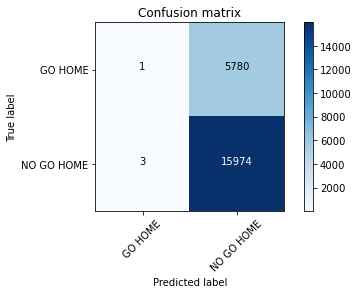

In [563]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['GO HOME','NO GO HOME'],normalize= False,  title='Confusion matrix')